In [1]:
%cd ..

/home/ivanstefanov/Repositories/used-cars-price-prediction


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [12]:
from price_predictor.data_preparation.feature_engineering import add_class_feature
from price_predictor.data_preparation.pick_or_drop_features import (
    pick_by_datatypes,
    drop_anonymous_features,
    drop_categorical_features,
    drop_by_name
)

In [35]:
data = pd.read_csv('data/cars.csv')
data.dropna(inplace=True)

In [36]:
df = add_class_feature(data)

df = drop_anonymous_features(df)
df = drop_by_name(df, 'model_name')
#df = drop_categorical_features(df)

In [37]:
df = pd.get_dummies(df)
df

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,...,drivetrain_rear,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.,class_high-end,class_low-end,class_mid-end
0,190000,2010,False,2.5,False,10900.00,False,9,13,16,...,0,0,0,0,0,1,0,0,0,1
1,290000,2002,False,3.0,False,5000.00,True,12,54,83,...,0,0,0,0,0,1,0,0,0,1
2,402000,2001,False,2.5,False,2800.00,True,4,72,151,...,0,0,0,0,0,1,0,0,0,1
3,10000,1999,False,3.0,False,9999.00,True,9,42,86,...,0,0,0,0,0,1,0,0,0,1
4,280000,2001,False,2.5,False,2134.11,True,14,7,7,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,False,3.5,False,2750.00,True,5,85,301,...,0,0,0,0,0,1,0,0,0,1
38527,321000,2004,False,2.2,False,4800.00,True,4,20,317,...,0,1,0,0,0,0,0,0,0,1
38528,777957,2000,False,3.5,False,4300.00,False,3,63,369,...,0,0,0,0,0,1,0,0,0,1
38529,20000,2001,False,2.0,False,4000.00,True,7,156,490,...,0,1,0,0,0,0,0,0,0,1


In [38]:
features = df.drop('price_usd', axis=1)
target = df['price_usd']

In [16]:
from price_predictor.trainers.train_ensamble_model import train_random_forest

In [17]:
rf = train_random_forest(features, target)

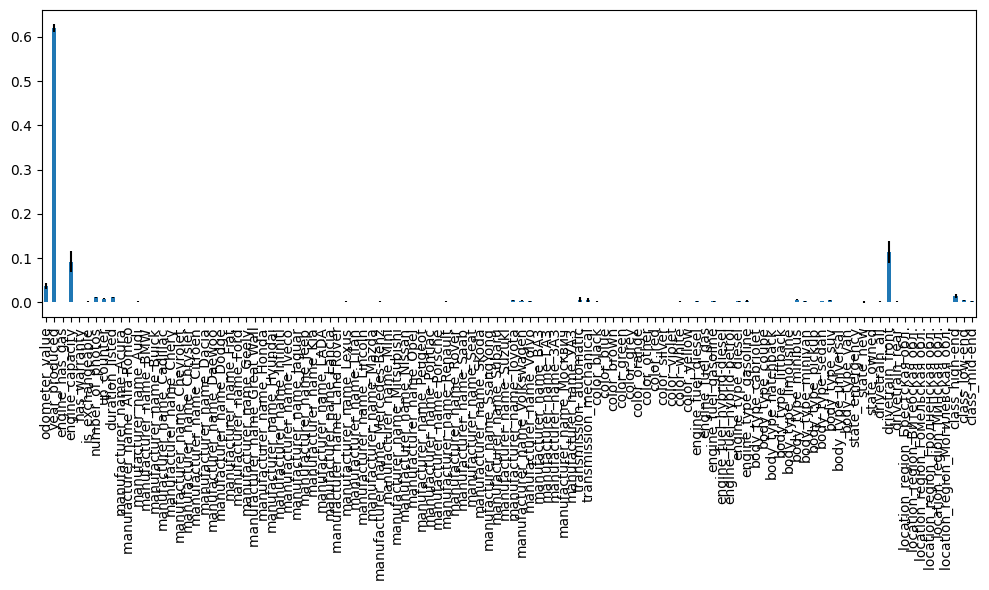

In [19]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features.columns)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
fig.tight_layout()

In [39]:
notable_features = ['odometer_value', 'year_produced', 'engine_capacity', 
                    'drivetrain_front', 'class_high-end', 'transmission_automatic',
                    'number_of_photos', 'up_counter', 'duration_listed']

In [40]:
notable_data = df[notable_features]
notable_data

,odometer_value,year_produced,engine_capacity,drivetrain_front,class_high-end,transmission_automatic,number_of_photos,up_counter,duration_listed
0,190000,2010,2.5,0,0,1,9,13,16
1,290000,2002,3.0,0,0,1,12,54,83
2,402000,2001,2.5,0,0,1,4,72,151
3,10000,1999,3.0,0,0,0,9,42,86
4,280000,2001,2.5,0,0,1,14,7,7
...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,1,0,1,5,85,301
38527,321000,2004,2.2,1,0,0,4,20,317
38528,777957,2000,3.5,1,0,1,3,63,369
38529,20000,2001,2.0,1,0,0,7,156,490


In [42]:
notable_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   odometer_value          38521 non-null  int64  
 1   year_produced           38521 non-null  int64  
 2   engine_capacity         38521 non-null  float64
 3   drivetrain_front        38521 non-null  uint8  
 4   class_high-end          38521 non-null  uint8  
 5   transmission_automatic  38521 non-null  uint8  
 6   number_of_photos        38521 non-null  int64  
 7   up_counter              38521 non-null  int64  
 8   duration_listed         38521 non-null  int64  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 2.2 MB


In [43]:
len(target)

38521

In [44]:
rf = train_random_forest(notable_features, target)

ValueError: could not convert string to float: 'odometer_value'